In [16]:
import pandas as pd

# Excelの読み込み
df_CTS = pd.read_excel("sample_1.xlsx")
df_OKA = pd.read_excel("sample_2.xlsx")
df_FUK = pd.read_excel("sample_3.xlsx")

# indexに日付を指定
df_CTS = df_CTS.set_index('日付')
df_OKA = df_OKA.set_index('日付')
df_FUK = df_FUK.set_index('日付')

# 3つのファイルを結合
df_concat = pd.concat([df_CTS, df_OKA, df_FUK], axis=0)
df_concat.to_excel('merge.xlsx')

In [20]:
# 日付順に並び替え
df_concat.sort_values(by="日付", ascending=True, inplace=True)
df_concat.head()

,便名,出発空港,到着空港,旅客数,貨物室量
日付,,,,,
2020-11-01,NH11,HND,CTS,171,14761
2020-11-01,NH251,HND,FUK,267,13069
2020-11-01,NH481,HND,OKA,153,13003
2020-11-02,NH251,HND,FUK,184,11671
2020-11-02,NH481,HND,OKA,179,17341


In [21]:
# 複数ファイルの読込&結合
# from glob import glob
# df = pd.DataFrame()
# file = glob("*.xlsx")

# for i in file:
#     print(i)

sample_1.xlsx
merge.xlsx
sample_2.xlsx
sample_3.xlsx


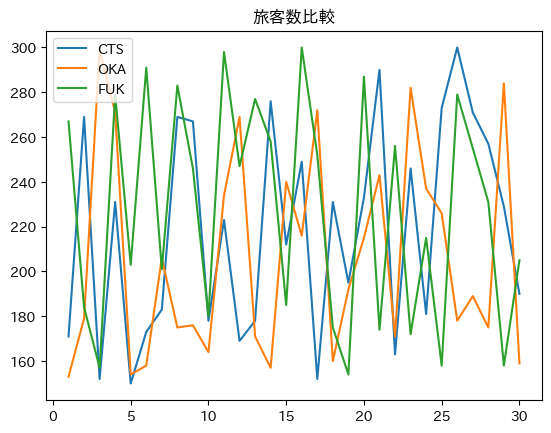

In [26]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots()

x = [i for i in range(1, 31)]

ax.plot(x, df_CTS.loc[:, "旅客数"], label="CTS")
ax.plot(x, df_OKA.loc[:, "旅客数"], label="OKA")
ax.plot(x, df_FUK.loc[:, "旅客数"], label="FUK")
ax.set_title('旅客数比較')
ax.legend()

plt.show()

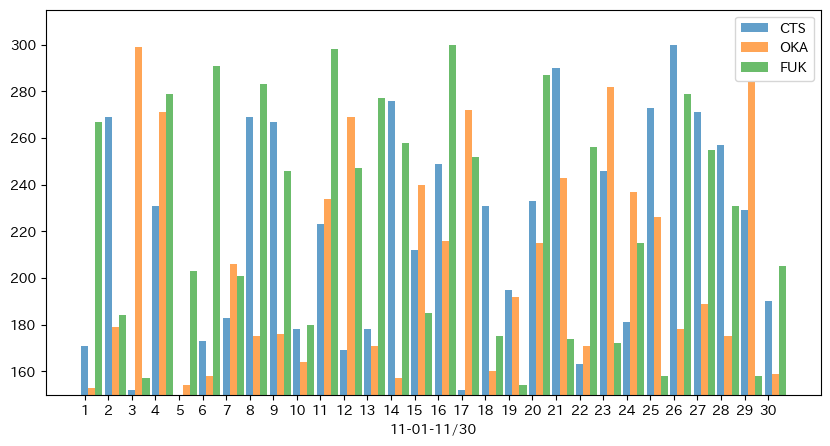

In [46]:
# 棒グラフ
fig, ax = plt.subplots(figsize=(10, 5))

width = 0.3
width2 = 0.6

x = [i for i in range(1, 31)]

x2 = [i + width for i in x]
x3 = [i + width2 for i in x]

ax.bar(x=x, height=df_CTS.loc[:, "旅客数"], width=width, label="CTS", alpha=0.7)
ax.bar(x=x2, height=df_OKA.loc[:, "旅客数"], width=width, label="OKA", alpha=0.7)
ax.bar(x=x3, height=df_FUK.loc[:, "旅客数"], width=width, label="FUK", alpha=0.7)

ax.set_label("旅客数比較")
ax.set_xlabel("11-01-11/30")
ax.legend(loc="best")

plt.xticks(x)
plt.ylim(ymin=150)
plt.show()

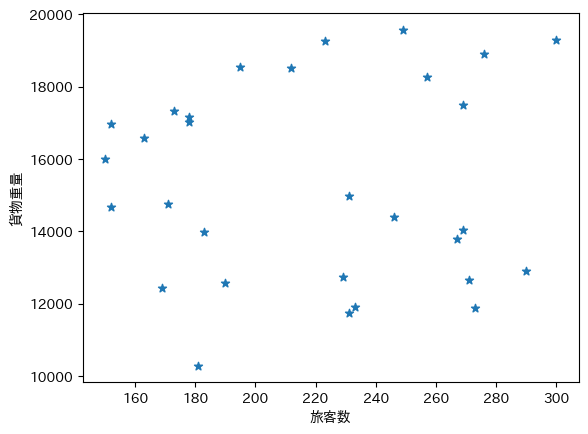

In [47]:
# 散布図
fig, ax = plt.subplots()

x = df_CTS["旅客数"]
y = df_CTS["貨物室量"]

ax.scatter(x=x, y=y, marker="*")
ax.set_xlabel("旅客数")
ax.set_ylabel("貨物重量")

plt.show()

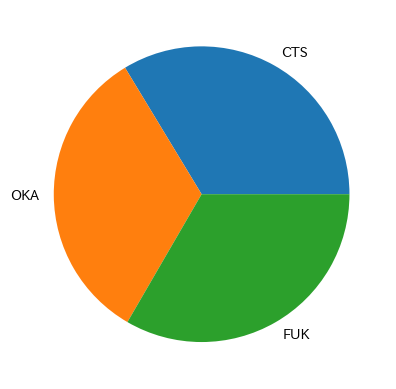

In [48]:
# 円グラフ
fig, ax = plt.subplots()

cts = df_CTS.loc[:, "貨物室量"].mean()
oka = df_OKA.loc[:, "貨物室量"].mean()
fuk = df_FUK.loc[:, "貨物室量"].mean()

data = [cts, oka, fuk]
label = ["CTS", "OKA", "FUK"]

ax.pie(x=data, labels=label)
plt.show()

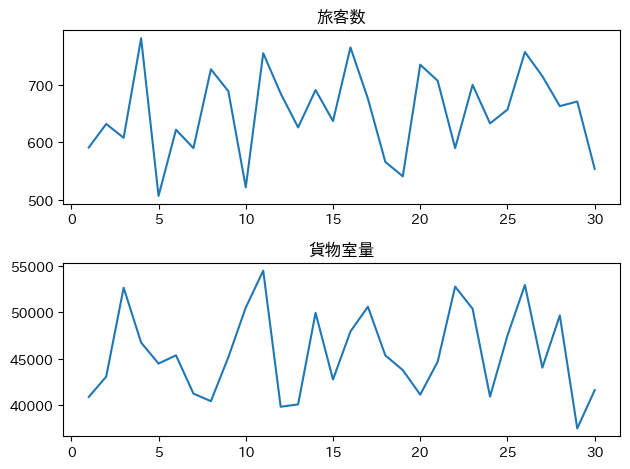

In [63]:
# 3空港をまとめた旅客数と貨物重量の日ごとの傾向を知りたい
# -> pandas resampleメソッドを使用
df = pd.read_excel("merge.xlsx")
df.set_index(keys="日付", inplace=True)
daily_df = df.resample("D").sum()

fig, ax = plt.subplots(2)

x = [i for i in range(1, 31)]
pax = daily_df.loc[:, "旅客数"]
cgo = daily_df.loc[:, "貨物室量"]

ax[0].plot(x, pax)
ax[0].set_title("旅客数")
ax[1].plot(x, cgo)
ax[1].set_title("貨物室量")

plt.tight_layout()
plt.show()